Goals:
- compare average pm10 of each year --> x-axe == year
- compare average pm10 of each month --> x-axe == month && hue == year

Todo:
- create dataframe which contains the total pm10, total days and averages of each year
    - columns: year, total pm10, total days, average pm10
    - rows: 2016, 2017, 2018, 2019, 2020, 2021, 2020, 2023, (2024 as outlier with 5 months done)
 
- create dataframe which contains (total pm10, total days and) average of each month per year -- can't I just do that manually by loading the file and doing .describe() and using the mean?
    - columns: month, avg 2016, avg 2017, avg 2018, etc
    - rows: jan, feb, march, april, may, june, july, august, september, october, november, december

#### Yearly Data Summary Idea - Table view

| Year | Total PM10 | Total Days | Average PM10 |
|------|------------|------------|--------------|
| 2016 |            |            |              |
| 2017 |            |            |              |
| 2018 |            |            |              |
| 2019 |            |            |              |
| 2020 |            |            |              |
| 2021 |            |            |              |
| 2022 |            |            |              |
| 2023 |            |            |              |
| 2024 |            |            |              |


#### Monthly Data Summary Idea - Table view
| Month     | Avg 2016 | Avg 2017 | Avg 2018 | Avg 2019 | Avg 2020 | Avg 2021 | Avg 2022 | Avg 2023 | Avg 2024 |
|-----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| January   |          |          |          |          |          |          |          |          |          |
| February  |          |          |          |          |          |          |          |          |          |
| March     |          |          |          |          |          |          |          |          |          |
| April     |          |          |          |          |          |          |          |          |          |
| May       |          |          |          |          |          |          |          |          |          |
| June      |          |          |          |          |          |          |          |          |          |
| July      |          |          |          |          |          |          |          |          |          |
| August    |          |          |          |          |          |          |          |          |          |
| September |          |          |          |          |          |          |          |          |          |
| October   |          |          |          |          |          |          |          |          |          |
| November  |          |          |          |          |          |          |          |          |          |
| December  |          |          |          |          |          |          |          |          |          |

This way no standard deviation tho?? Need to look into the documentation again

In [1]:
# GET ALL THE JSONS INTO ONE DATAFRAME
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import glob

# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc124 = os.path.join("..", "mc010_wedding", "*.json")
files = glob.glob(file_path_mc124)

# Create empty list to store dataframes
li_all_files = []

# Loop through list of files and read each one into a dataframe and append to list
for f in files:
    # Read in json
    temp_df = pd.read_json(f)
    # Append df to list
    li_all_files.append(temp_df)

# Optionally concatenate all dataframes into one if needed
if li_all_files:
    combined_df = pd.concat(li_all_files)
    print(f'Combined dataframe shape: {combined_df.shape}')
else:
    print('No dataframes were created.')

Combined dataframe shape: (627044, 6)


In [2]:
# FILTER BY pm10 AND ONLY KEEP THE DATETIME AND VALUE FEATURE SINCE THE REST IS FIX
df_pm10 = combined_df[(combined_df['core'] == 'pm10')]
df_pm10_reduced = df_pm10[['datetime', 'value']]
df_pm10_reduced['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)
#df_pm10_reduced = df_pm10_reduced.set_index('datetime').sort_index() removed since it didnt work otherwise
df_pm10_reduced.sample(5)
# it begins on Febr 29th 2016 -- completely remove Feb & March 2016 from prediction and start April 2016 TODO

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\2116868801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_reduced['datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], utc=True)


,datetime,value
3672,2023-01-06 10:00:00+00:00,16.0
2898,2022-04-10 18:00:00+00:00,5.0
1944,2020-07-18 09:00:00+00:00,19.0
1950,2017-12-18 09:00:00+00:00,18.0
1074,2021-06-23 10:00:00+00:00,18.0


In [3]:
df_pm10_reduced['year'] = df_pm10_reduced['datetime'].dt.year
df_pm10_reduced_no_NaN = df_pm10_reduced.dropna(subset=['value']) # gedropped für null value um Durschnitt zu berechnen

df_summary = df_pm10_reduced_no_NaN.groupby('year').agg(
    total_pm10=('value', 'sum'),             # Sum of PM10 values
    total_measurements=('datetime', 'nunique'),      # Count unique measurements based on datetime
    average_pm10=('value', lambda x: x.mean())  # Calculate average PM10 excluding NaN
).reset_index()

df_summary = df_summary.sort_values(by='year')

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\2994617096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_reduced['year'] = df_pm10_reduced['datetime'].dt.year


In [4]:
df_summary
# Wann war Covid nochmal? 2019 oder 2020?
# Ausgangssperrenzeiträume - API? RKI -- Bewegungsdaten von Menschen unterwechs

,year,total_pm10,total_measurements,average_pm10
0,2014,212452.0,8522,24.929829
1,2015,190162.0,8749,21.735284
2,2016,182074.0,8670,21.000461
3,2017,172276.0,8665,19.881823
4,2018,186460.0,8721,21.380576
5,2019,155470.0,8725,17.818911
6,2020,139848.0,8779,15.929833
7,2021,141818.0,8753,16.202216
8,2022,144815.0,8737,16.574911
9,2023,132069.0,8746,15.100503


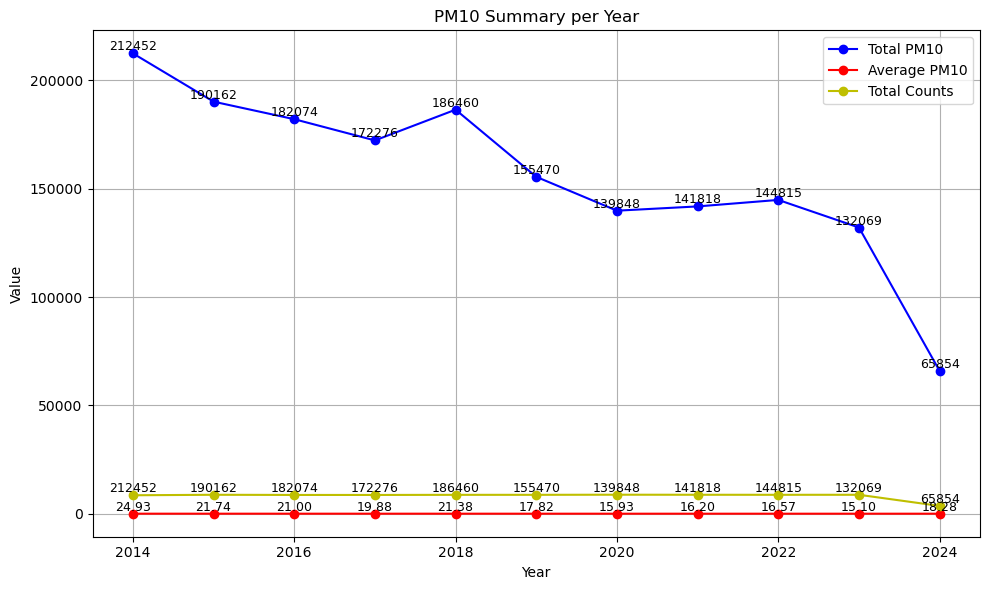

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_summary['year'], df_summary['total_pm10'], marker='o', linestyle='-', color='b', label='Total PM10')
plt.plot(df_summary['year'], df_summary['average_pm10'], marker='o', linestyle='-', color='r', label='Average PM10')
plt.plot(df_summary['year'], df_summary['total_measurements'], marker='o', linestyle='-', color='y', label='Total Counts')

# Adding annotations (rounded)
for i, (x, y1, y2, y3) in enumerate(zip(df_summary['year'], df_summary['total_pm10'], df_summary['average_pm10'], df_summary['total_measurements'])):
    plt.text(x, y1, f'{y1:.0f}', ha='center', va='bottom', fontsize=9)  # Total PM10
    plt.text(x, y2, f'{y2:.2f}', ha='center', va='bottom', fontsize=9)  # Average PM10
    plt.text(x, y3, f'{y1:.0f}', ha='center', va='bottom', fontsize=9)  # Total Measurements per year


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('PM10 Summary per Year')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
#zweite y-Achse für Total Counts

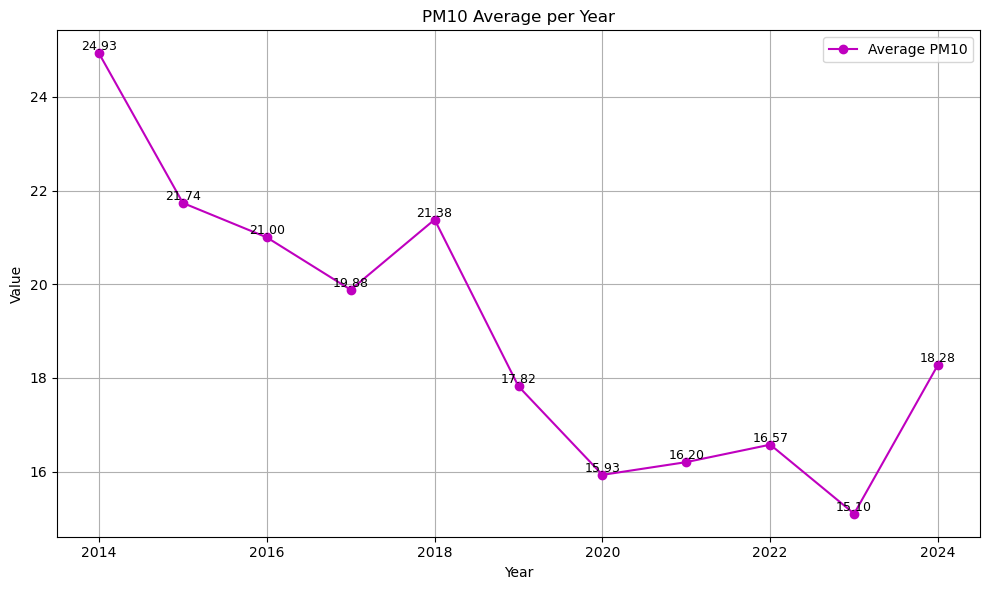

In [6]:
# Plotting
plt.figure(figsize=(10, 6)) 
plt.plot(df_summary['year'], df_summary['average_pm10'], marker='o', linestyle='-', color='m', label='Average PM10')

# Adding numbers 
for index, row in df_summary.iterrows():
    plt.text(row['year'], row['average_pm10'], f'{row["average_pm10"]:.2f}', ha='center', va='bottom', fontsize=9)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('PM10 Average per Year')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
# Was ist mit 2023? Neue Gesetze -- Anschreiben, ob 2023 irgendwas passiert ist?

In [7]:
# Extract year and month from datetime
df_monthly = df_pm10_reduced
df_monthly['year'] = df_pm10_reduced['datetime'].dt.year
df_monthly['month'] = df_pm10_reduced['datetime'].dt.month_name()

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\118122891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly['year'] = df_pm10_reduced['datetime'].dt.year
C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\118122891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly['month'] = df_pm10_reduced['datetime'].dt.month_name()


C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\1764268433.py:17: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.


     year     month      value
0    2013  December        NaN
5    2014   January  36.550489
4    2014  February  25.641369
8    2014     March  34.851528
1    2014     April  23.447109
..    ...       ...        ...
123  2024   January  16.051075
122  2024  February  13.945402
124  2024     March  27.663526
121  2024     April  14.969402
125  2024       May  18.412857

[126 rows x 3 columns]


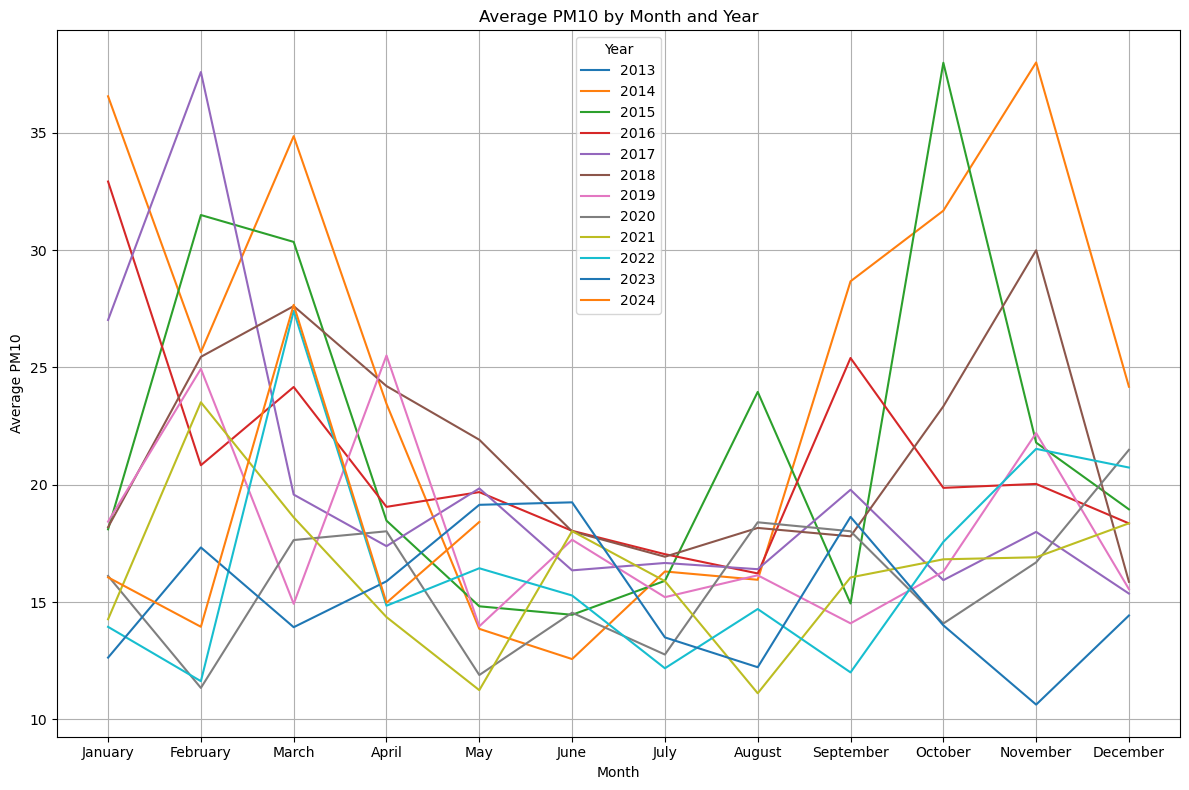

In [8]:
# Group by year and month, calculate mean PM10
avg_pm10_by_month = df_monthly.groupby(['year', 'month'])['value'].mean().reset_index()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with specified order
avg_pm10_by_month['month'] = pd.Categorical(avg_pm10_by_month['month'], categories=month_order, ordered=True)

# Sort by 'month' for proper order in final DataFrame
avg_pm10_by_month = avg_pm10_by_month.sort_values(['year', 'month'])
print(avg_pm10_by_month)
# Plotting with seaborn
plt.figure(figsize=(12, 8))
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(data=avg_pm10_by_month, x='month', y='value', hue='year', palette=sns.color_palette("tab10"), dashes=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average PM10')
plt.title('Average PM10 by Month and Year')
plt.legend(title='Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
# November 2023 ?? Daten fehlen

#### 2016-2019

C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\AppData\Local\Temp\ipykernel_3560\4174252943.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=avg_pm10_by_mon

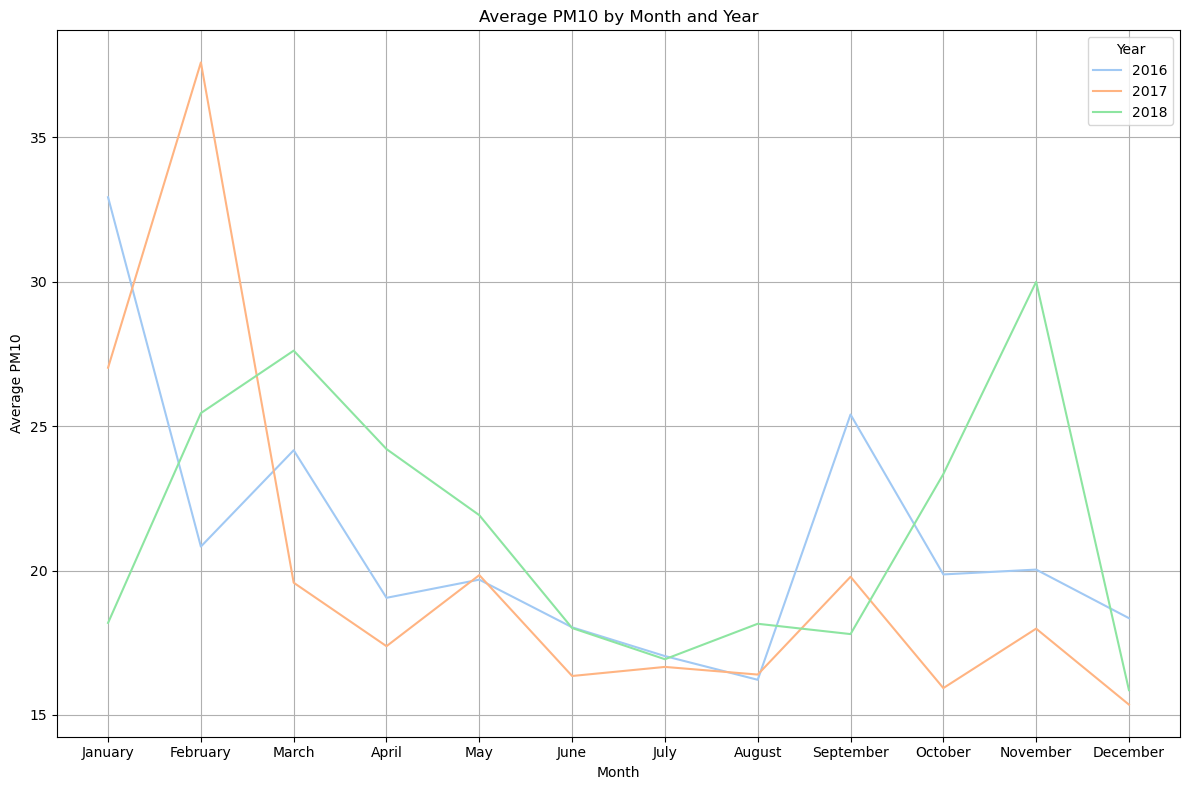

In [9]:
# Filter for specific years
years_to_plot = [2016, 2017, 2018]
avg_pm10_by_month_subset = avg_pm10_by_month[avg_pm10_by_month['year'].isin(years_to_plot)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_pm10_by_month_subset, x='month', y='value', hue='year', palette=sns.color_palette("pastel"), dashes=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average PM10')
plt.title('Average PM10 by Month and Year')
plt.legend(title='Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

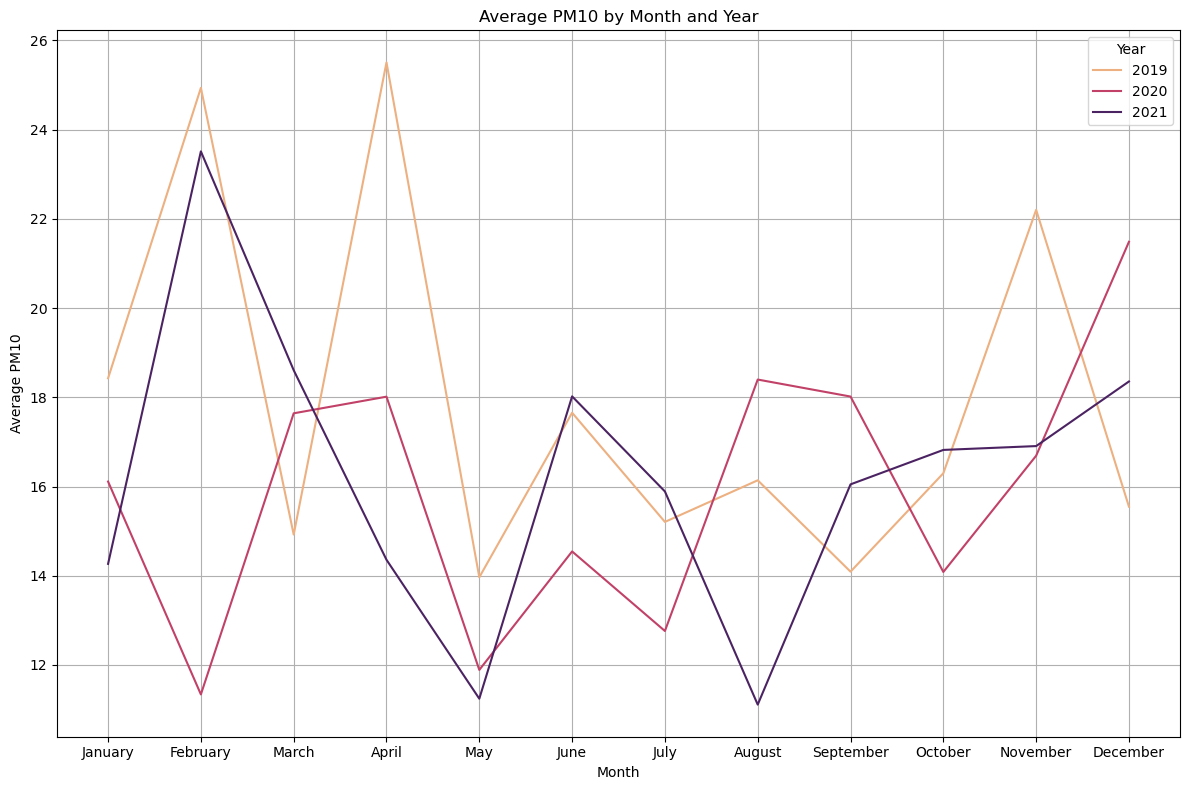

In [10]:
# Filter for specific years
years_to_plot = [2019, 2020, 2021]
avg_pm10_by_month_subset = avg_pm10_by_month[avg_pm10_by_month['year'].isin(years_to_plot)]

plt.figure(figsize=(12, 8))
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(data=avg_pm10_by_month_subset, x='month', y='value', hue='year', palette=sns.color_palette("flare", as_cmap=True), dashes=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average PM10')
plt.title('Average PM10 by Month and Year')
plt.legend(title='Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\a_n_n\anaconda3\envs\basics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

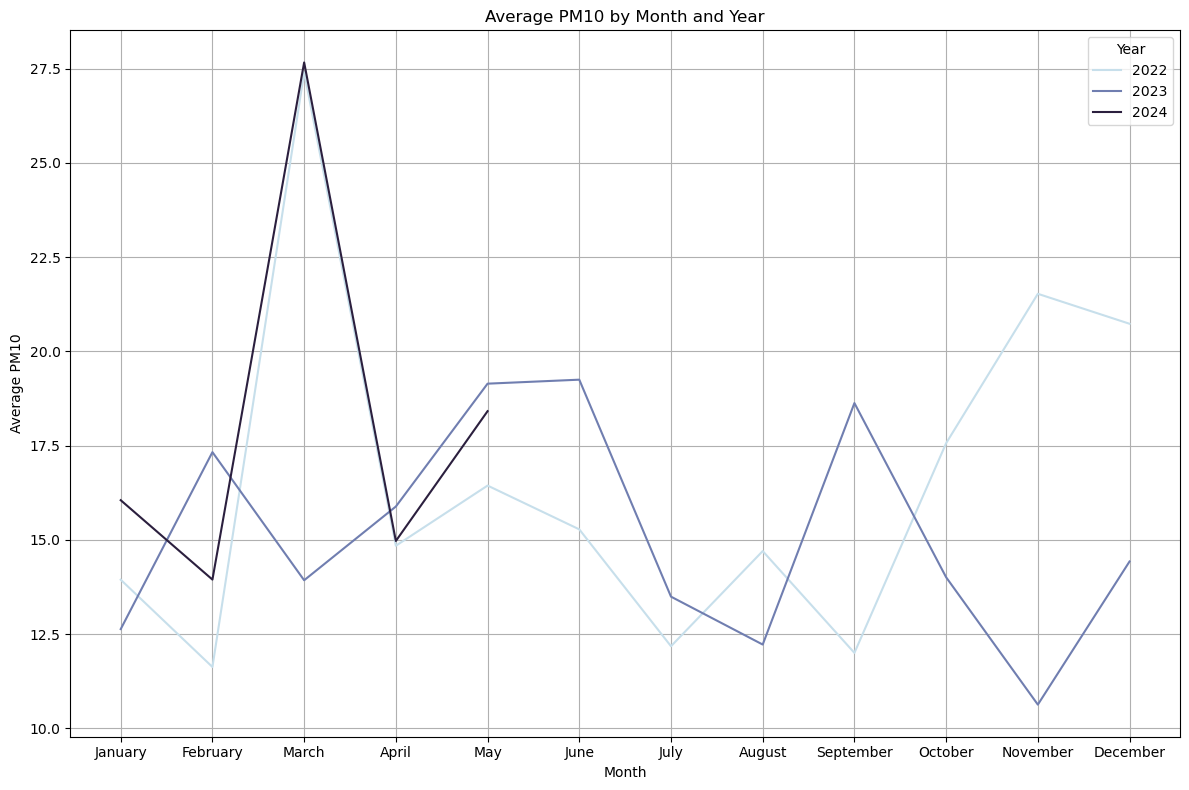

In [11]:
# Filter for specific years
years_to_plot = [2022, 2023, 2024]
avg_pm10_by_month_subset = avg_pm10_by_month[avg_pm10_by_month['year'].isin(years_to_plot)]

plt.figure(figsize=(12, 8))
pd.option_context('mode.use_inf_as_na', True)
sns.lineplot(data=avg_pm10_by_month_subset, x='month', y='value', hue='year', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True), dashes=True)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average PM10')
plt.title('Average PM10 by Month and Year')
plt.legend(title='Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## TODO analyse how this years first five month compare to the other years first five month only

#### Compare November for 2021, 2022, 2023

In [16]:
# analysing Nov 2021
file_path_nov_2021 = os.path.join("..", "mc124_data","mc124_data_2021_11.json")# join because different os use either \ or / as file path seperators
df_nov_2021 = pd.read_json(file_path_nov_2021)
df_pm10_nov_2021 = df_nov_2021[(df_nov_2021['core'] == 'pm10')]
# November 30 Tage
df_pm10_nov_2021.describe()

,value
count,720.000000
mean,24.219444
std,11.699371
min,5.000000
25%,17.000000
50%,21.000000
75%,30.000000
max,156.000000


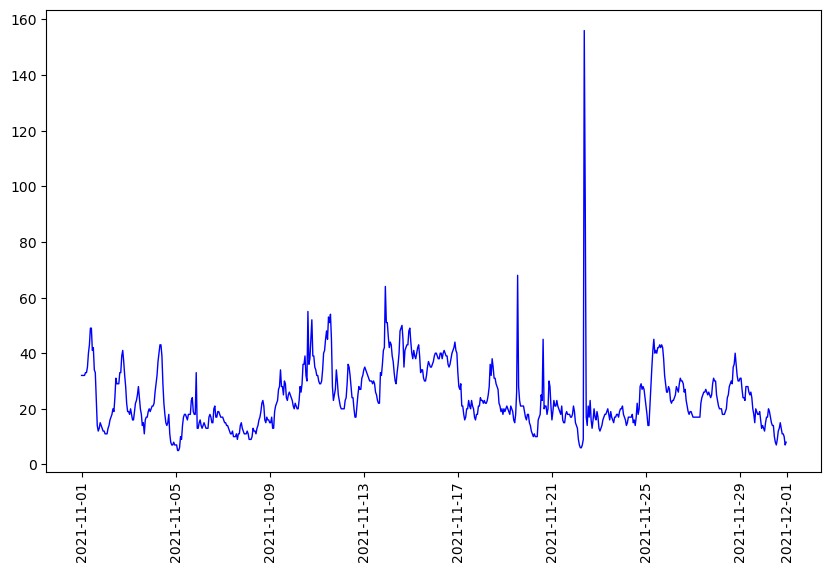

In [18]:
df_pm10_nov_2021 = df_pm10_nov_2021.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_nov_2021[['value']], color="blue", linewidth=1)

In [19]:
# analysing Nov 2022
file_path_nov_2022 = os.path.join("..", "mc124_data","mc124_data_2022_11.json")# join because different os use either \ or / as file path seperators
df_nov_2022 = pd.read_json(file_path_nov_2022)
df_pm10_nov_2022 = df_nov_2022[(df_nov_2022['core'] == 'pm10')]
# November 30 Tage
df_pm10_nov_2022.describe()

,value
count,720.000000
mean,26.791667
std,9.814181
min,11.000000
25%,19.000000
50%,25.000000
75%,33.000000
max,79.000000


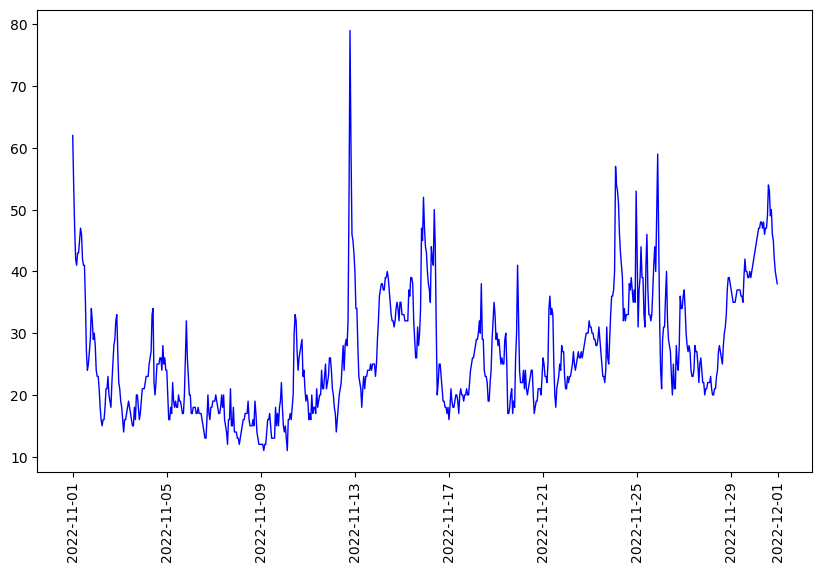

In [20]:
df_pm10_nov_2022 = df_pm10_nov_2022.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_nov_2022[['value']], color="blue", linewidth=1)

In [21]:
# analysing Nov 2023
file_path_nov_2023 = os.path.join("..", "mc124_data","mc124_data_2023_11.json")# join because different os use either \ or / as file path seperators
df_nov_2023 = pd.read_json(file_path_nov_2023)
df_pm10_nov_2023 = df_nov_2023[(df_nov_2023['core'] == 'pm10')]
# November 30 Tage
df_pm10_nov_2023.describe()

,value
count,720.000000
mean,14.459722
std,6.238071
min,6.000000
25%,10.000000
50%,14.000000
75%,17.000000
max,86.000000


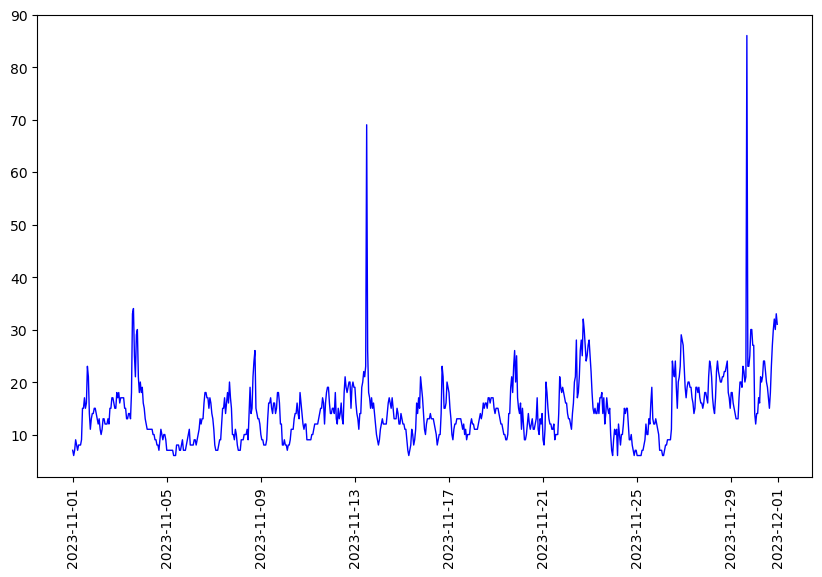

In [22]:
df_pm10_nov_2023 = df_pm10_nov_2023.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(df_pm10_nov_2023[['value']], color="blue", linewidth=1)